## Inisialisasi Library

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### import data dari file iris.csv

In [2]:
dataset = pd.read_csv('iris.csv')
display(dataset)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## membagi label dan data preprocessing

In [3]:
label = dataset['variety']
dataTrain = dataset.drop('variety', axis =1)
col_name = ['sepal.length', 'sepal.width','petal.length','petal.width']


## preprocessing data

In [4]:
scaled_data = MinMaxScaler().fit_transform(dataTrain)
df_scaled = pd.DataFrame(data = scaled_data, columns=col_name)
df_scaled.insert(4, "variety", label)
display(df_scaled)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,Setosa
1,0.166667,0.416667,0.067797,0.041667,Setosa
2,0.111111,0.500000,0.050847,0.041667,Setosa
3,0.083333,0.458333,0.084746,0.041667,Setosa
4,0.194444,0.666667,0.067797,0.041667,Setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Virginica
146,0.555556,0.208333,0.677966,0.750000,Virginica
147,0.611111,0.416667,0.711864,0.791667,Virginica
148,0.527778,0.583333,0.745763,0.916667,Virginica


In [5]:
features = df_scaled[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
# display(features)
euclidean_dist = euclidean_distances(features,features)

print(type(euclidean_dist))


<class 'numpy.ndarray'>


## Pelatihan Data menggunakan Algoritma K-NN

In [6]:
X = features
y = df_scaled['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model
knn.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = knn.predict(X_test)

## Evaluasi model dengan Confussion Metrics

In [7]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9777777777777777
Confusion Matrix:
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.95      1.00      0.97        18
   Virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



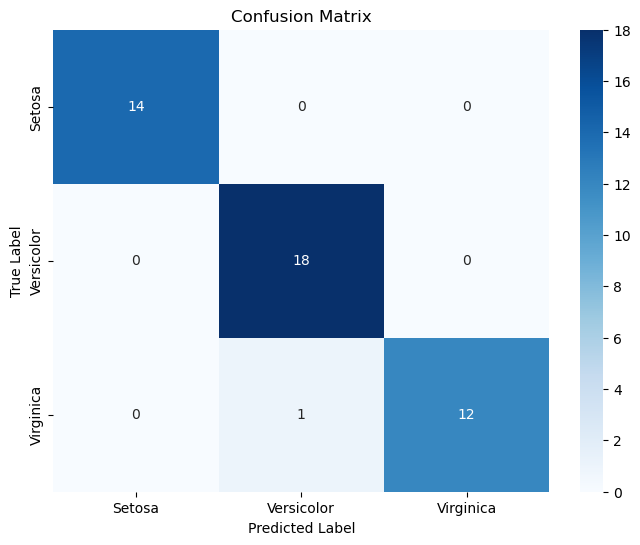

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df_scaled['variety'].unique(), yticklabels=df_scaled['variety'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


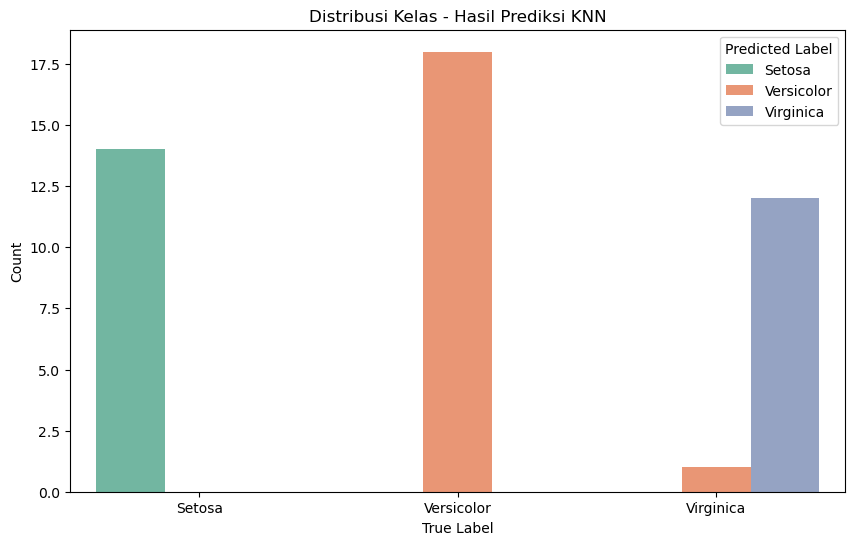

In [9]:
df_test = X_test.copy()
df_test['True Label'] = y_test
df_test['Predicted Label'] = y_pred

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
sns.countplot(x='True Label', hue='Predicted Label', data=df_test, palette='Set2')
plt.title('Distribusi Kelas - Hasil Prediksi KNN')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.show()

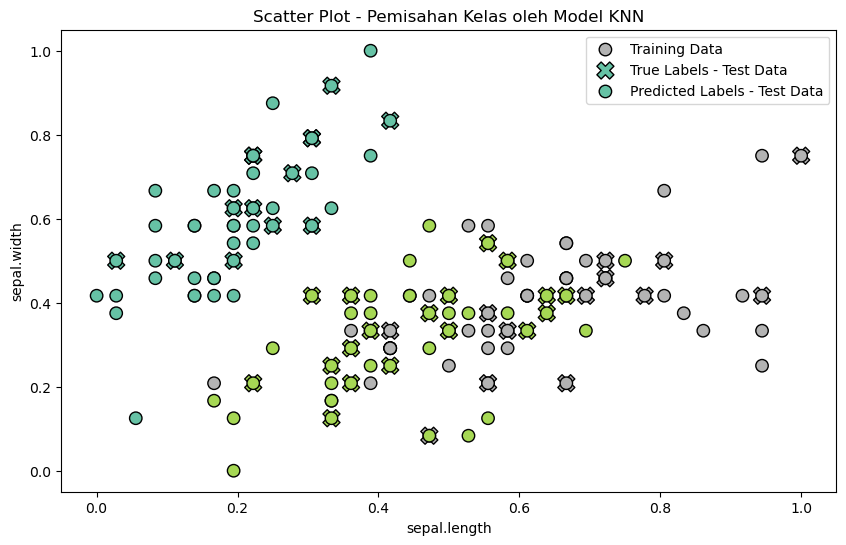

In [17]:
# import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengubah kelas menjadi angka
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Memilih dua fitur untuk scatter plot
feature1 = 'sepal.length'
feature2 = 'sepal.width'

# Membuat scatter plot untuk data latih
plt.figure(figsize=(10, 6))
plt.scatter(X_train[feature1], X_train[feature2], c=y_train_encoded, cmap='Set2', label='Training Data', edgecolors='k', s=80)

# Membuat scatter plot untuk data uji dengan markah 'X' untuk titik yang diprediksi salah
plt.scatter(X_test[feature1], X_test[feature2], c=y_test_encoded, marker='X', cmap='Set2', label='True Labels - Test Data', s=150, edgecolors='k')
plt.scatter(X_test[feature1], X_test[feature2], c=le.transform(y_pred), marker='o', cmap='Set2', label='Predicted Labels - Test Data', s=80, edgecolors='k')

plt.title('Scatter Plot - Pemisahan Kelas oleh Model KNN')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()